In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import anndata as ad
import scanpy.external as sce
from sklearn import preprocessing
import pickle5 as pickle
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing
import sklearn
from sklearn.metrics import accuracy_score

from utils import *


eps=1e-100


/home/jialiulab/.conda/envs/fusemap_glue/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
ad_tissueregion_new =sc.read_h5ad('source_data/ad_embed.h5ad')    


In [4]:
A1N_list={'all':[ 'OB_2', 'OB_4','CNU_13',
     'CNU_6', 'CNU_8', 'CNU_11', 
    'CNU_9','CTX_A_13',  'CTX_A_16',
    'CTX_A_3','CTX_A_5','CTX_A_8', 
    'CTX_A_9', 'CTX_B_1','CTX_B_2', 'CTX_B_3',
    'CTX_B_5', 'CTX_B_8', 'CTX_HIP_5', 
    'TH_2','TH_5','TH_4', 
    'MB_P_MY_8', 'MB_P_MY_21',]}


FuseMap_list={'all':['OB_2_1', 'OB_2_2',
    'OB_4_1','OB_4_2','CNU_13_1','CNU_13_2',  
    'CNU_6_1','CNU_6_2','CNU_8_1', 'CNU_8_2','CNU_8_3','CNU_8_4',
     'CNU_11_1', 'CNU_11_2', 'CNU_9_1', 'CNU_9_2',
    'CTX_A_13_1','CTX_A_13_2','CTX_A_13_3','CTX_A_13_4',
    'CTX_A_16_1','CTX_A_16_2',  'CTX_A_16_3', 'CTX_A_16_4',
    'CTX_A_3_1','CTX_A_3_2','CTX_A_3_3',
    'CTX_A_5_1','CTX_A_5_2','CTX_A_5_3', 'CTX_A_5_4','CTX_A_5_5',
    'CTX_A_8_1', 'CTX_A_8_2',  'CTX_A_8_3', 
    'CTX_A_9_1','CTX_A_9_2',  'CTX_B_1_1','CTX_B_1_2',
    'CTX_B_2_1','CTX_B_2_2','CTX_B_3_1','CTX_B_3_2', 'CTX_B_3_3', 
    'CTX_B_5_1', 'CTX_B_5_2', 'CTX_B_5_3', 'CTX_B_5_4','CTX_B_8_1', 'CTX_B_8_2',  'CTX_B_8_3',
     'CTX_HIP_5', 'CTX_HIP_7','TH_2_1','TH_2_2','TH_5_1', 'TH_5_2',
    'TH_4_1',  'TH_4_2','MB_P_MY_8_1','MB_P_MY_8_2',  'MB_P_MY_8_3',
    'MB_P_MY_21_1', 'MB_P_MY_21_2']}

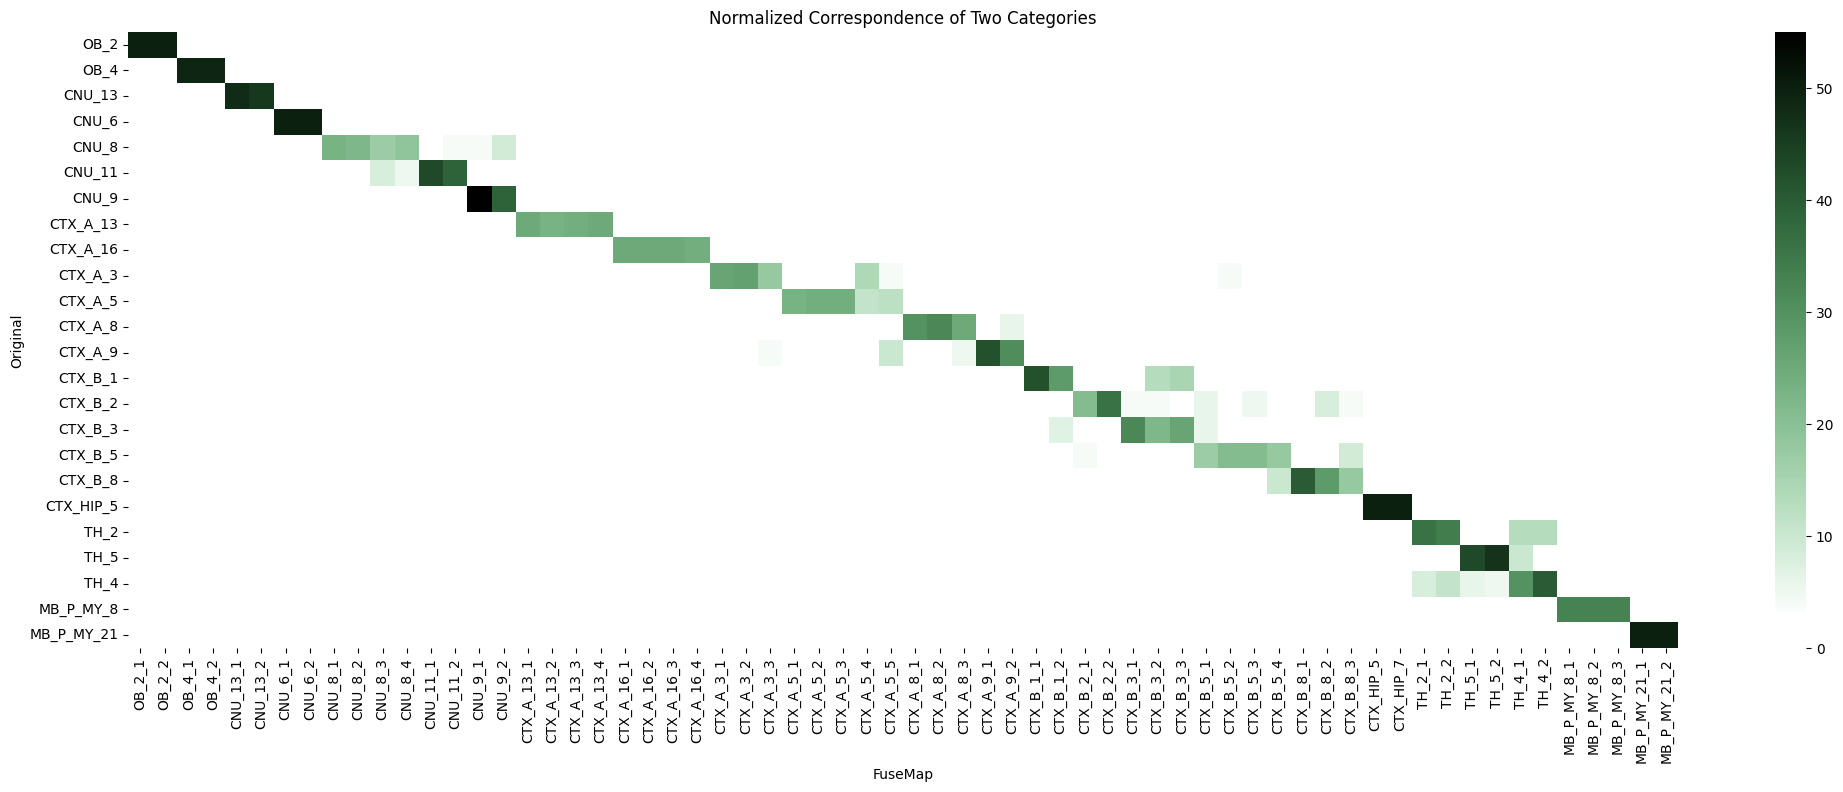

In [10]:
for look_label1 in ['all']:

    keep_list=A1N_list[look_label1]
    now_keep_list=FuseMap_list[look_label1]
       
    look_label=look_label1#'LSX_HY_MB_HB'

    new_tissueregion_starmap_sub = ad_tissueregion_new#[tissueregion_starmap_sub.obs['gt_tissue_region_main'].isin([look_label])]
    new_tissueregion_starmap_sub = new_tissueregion_starmap_sub[new_tissueregion_starmap_sub.obs['gt_tissue_region_sub'].isin(keep_list)]
    new_tissueregion_starmap_sub = new_tissueregion_starmap_sub[new_tissueregion_starmap_sub.obs['transfer_gt_tissue_region_sub_STARmap'].isin(now_keep_list)]

    GT=np.array(new_tissueregion_starmap_sub.obs['gt_tissue_region_sub'] )
    PRED=np.array(new_tissueregion_starmap_sub.obs['transfer_gt_tissue_region_sub_STARmap'])

    cross_tab = pd.crosstab(pd.Series(GT, name='Original'),
                                    pd.Series(PRED, name='FuseMap'))

    cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=0), axis=1)
    cross_tab_normalized = cross_tab_normalized.div(cross_tab_normalized.sum(axis=1), axis=0)

    cross_tab_normalized = cross_tab_normalized*100
    cross_tab_normalized = np.around(cross_tab_normalized)
    cross_tab_normalized=cross_tab_normalized.astype('int')
    
    
        
    import seaborn as sns
    cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=1.05, reverse=False, as_cmap=True)

    cross_tab_normalized = cross_tab_normalized[now_keep_list]

    cross_tab_normalized = cross_tab_normalized.loc[keep_list ]


        
    # Plot heatmap
    plt.figure(figsize=(25,8))
    ax=sns.heatmap(cross_tab_normalized, cmap=cmap,)

    plt.title("Normalized Correspondence of Two Categories")
#     plt.savefig(f'figures_refine/correspondence_re_all.pdf',dpi=300, transparent=True)
    plt.show()


In [11]:
A1N_list={'all':['OB_1','OB_3','OB_5',
                 'CNU_1', 'CNU_2', 'CNU_3', 'CNU_4', 'CNU_5', 'CNU_7','CNU_10','CNU_12',
                 'CTX_A_1', 'CTX_A_2',  'CTX_A_4','CTX_A_6',  'CTX_A_7',  'CTX_A_10', 'CTX_A_11',  'CTX_A_12',  'CTX_A_15', 
                 'CTX_A_14','CTX_B_4',
                  'CTX_B_6', 'CTX_B_7',   'CTX_B_9', 'CTX_B_10', 'CTX_B_11', 'CTX_B_12',  
                 'CTX_HIP_1', 'CTX_HIP_2', 'CTX_HIP_3','CTX_HIP_4',  'CTX_HIP_6',
                 'CBX_1', 'CBX_2', 'CBX_3','CBX_4',
                'HY_1', 'HY_2', 'HY_3', 'HY_4', 'HY_5','HY_6', 'HY_7', 'HY_8','HY_9', 'HY_10','HY_11', 'HY_12', 
                 'TH_1', 'TH_3', 'TH_6','TH_8',  'TH_9', 'TH_7',  
                   'MB_P_MY_1',  'MB_P_MY_2', 'MB_P_MY_3', 'MB_P_MY_4','MB_P_MY_5', 'MB_P_MY_6',
              'MB_P_MY_7', 'MB_P_MY_9',   'MB_P_MY_10', 'MB_P_MY_17', 
             'MB_P_MY_11', 'MB_P_MY_12',  'MB_P_MY_13','MB_P_MY_14','MB_P_MY_15', 
                 'MB_P_MY_16', 'MB_P_MY_18', 'MB_P_MY_19', 'MB_P_MY_20', 
                   'FT_1','FT_2', 'FT_3', 'FT_4',
                 'VS_1', 'VS_2', 'VS_3', 'MNG_1',]}


FuseMap_list={'all':['OB_1','OB_3','OB_5',
                  'CNU_1', 'CNU_2', 'CNU_3', 'CNU_4', 'CNU_5',  'CNU_7','CNU_10','CNU_12',
                 'CTX_A_1', 'CTX_A_2',  'CTX_A_4','CTX_A_6',  'CTX_A_7',  'CTX_A_10', 
                     'CTX_A_11',  'CTX_A_12',  'CTX_A_15', 
                 'CTX_A_14','CTX_B_4',
                  'CTX_B_6', 'CTX_B_7',  'CTX_B_9', 'CTX_B_10', 'CTX_B_11', 'CTX_B_12',    
                  'CTX_HIP_1', 'CTX_HIP_2', 'CTX_HIP_3','CTX_HIP_4',  'CTX_HIP_6',
                 'CB_1', 'CB_2', 'CB_3','CBX_4',
                 'HY_1', 'HY_2', 'HY_3', 'HY_4', 'HY_5','HY_6', 'HY_7', 'HY_8','HY_9', 'HY_10','HY_11', 'HY_12', 
                   'TH_1','TH_3', 'TH_6','TH_8',  'TH_9', 'TH_7',
                   'MB_P_MY_1',  'MB_P_MY_2', 'MB_P_MY_3','MB_P_MY_4', 'MB_P_MY_5', 'MB_P_MY_6',
              'MB_P_MY_7', 'MB_P_MY_9',   'MB_P_MY_10', 'MB_P_MY_17', 
             'MB_P_MY_11', 'MB_P_MY_12', 'MB_P_MY_13', 'MB_P_MY_14','MB_P_MY_15', 
                 'MB_P_MY_16', 'MB_P_MY_18', 'MB_P_MY_19', 'MB_P_MY_20', 
                'FT_1','FT_2', 'FT_3', 'FT_4',
                 'VS_1', 'VS_2', 'VS_3', 
                 'MNG_1',]}



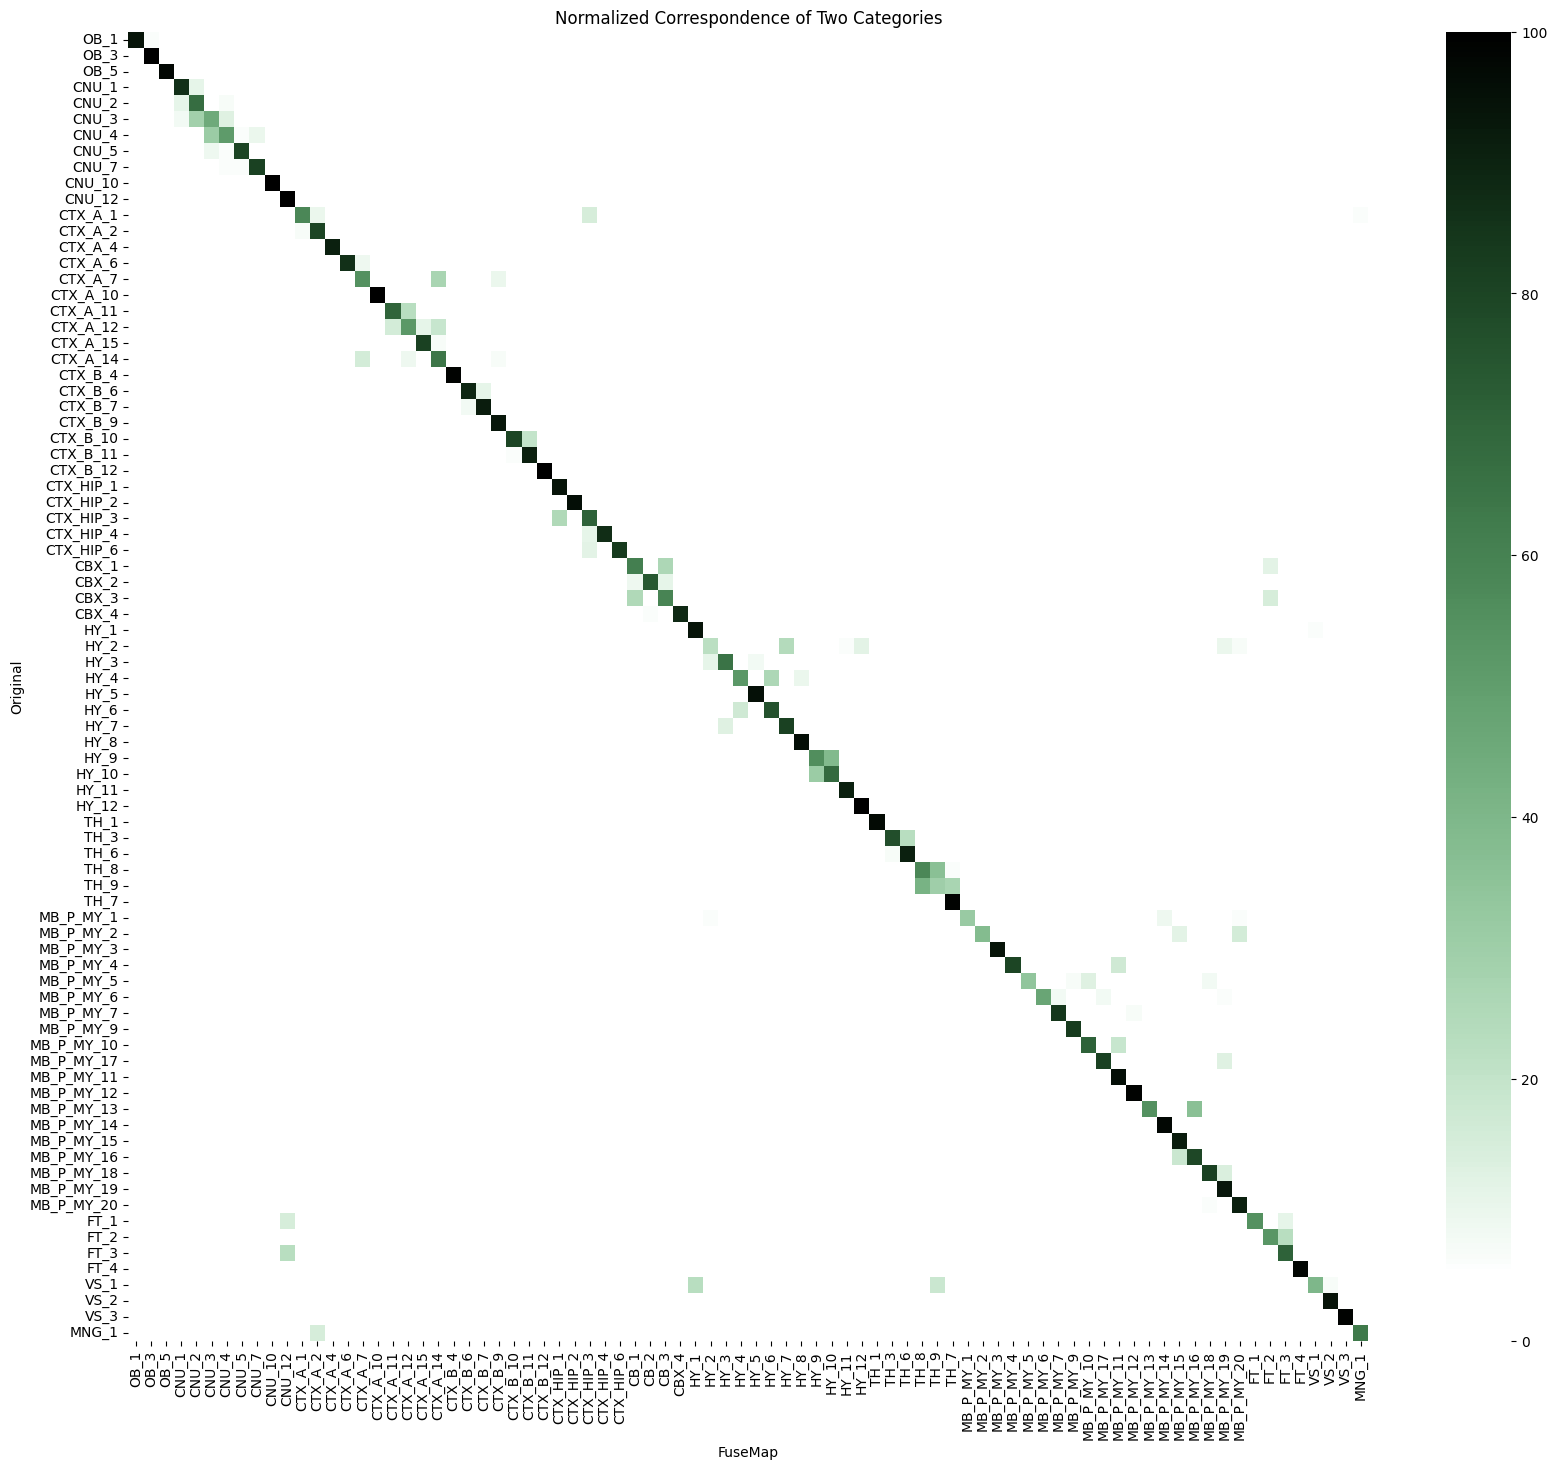

In [12]:
for look_label1 in ['all']:

    keep_list=A1N_list[look_label1]
    now_keep_list=FuseMap_list[look_label1]
    
    look_label=look_label1

    new_tissueregion_starmap_sub = ad_tissueregion_new#[tissueregion_starmap_sub.obs['gt_tissue_region_main'].isin([look_label])]
    new_tissueregion_starmap_sub = new_tissueregion_starmap_sub[new_tissueregion_starmap_sub.obs['gt_tissue_region_sub'].isin(keep_list)]
    new_tissueregion_starmap_sub = new_tissueregion_starmap_sub[new_tissueregion_starmap_sub.obs['transfer_gt_tissue_region_sub_STARmap'].isin(now_keep_list)]

    GT=np.array(new_tissueregion_starmap_sub.obs['gt_tissue_region_sub'] )
    PRED=np.array(new_tissueregion_starmap_sub.obs['transfer_gt_tissue_region_sub_STARmap'])

    cross_tab = pd.crosstab(pd.Series(GT, name='Original'),
                                    pd.Series(PRED, name='FuseMap'))

    cross_tab_normalized = cross_tab.div(cross_tab.sum(axis=0), axis=1)
    cross_tab_normalized = cross_tab_normalized.div(cross_tab_normalized.sum(axis=1), axis=0)

    cross_tab_normalized = cross_tab_normalized*100
    cross_tab_normalized = np.around(cross_tab_normalized)
    cross_tab_normalized=cross_tab_normalized.astype('int')
    
    
        
    import seaborn as sns
    cmap = sns.cubehelix_palette(start=2, rot=0, dark=0, light=1.05, reverse=False, as_cmap=True)

    cross_tab_normalized = cross_tab_normalized[now_keep_list]

    cross_tab_normalized = cross_tab_normalized.loc[keep_list ]


        
    # Plot heatmap
    plt.figure(figsize=(20,17))
    ax=sns.heatmap(cross_tab_normalized, cmap=cmap,)

    plt.title("Normalized Correspondence of Two Categories")
#     plt.savefig(f'figures_refine/correspondence_same_re_all.pdf',dpi=300, transparent=True)
    plt.show()
